In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Load and preprocess the data
df = pd.read_csv("dungeon performance ranks 12.01 - 16.01.csv")  # Replace with your data file path

# Step 1: Order runs by time and calculate churn
df = df.sort_values(by=["userId", "entryTime"])

df["is_last_run"] = df.groupby("userId")["rn"].transform("max") == df["rn"]

# Step 2: Calculate 'runs_to_churn' for each user
df["runs_to_churn"] = df.groupby("userId")["rn"].transform("max") - df["rn"]



In [30]:
df

,userId,gameModeName,sessionId,eventType,PartyMembers,entryTime,exitTime,duration,gameTime,min_fps,...,p75_fps,min_ping,max_ping,p25_ping,median_ping,p75_ping,p90_ping,rn,is_last_run,runs_to_churn
3450,01HV74Y9CEMS2PHHPT5YN624RC,TUTORIAL_TIER_1,01JHDD7CQHG1GEVZ9X9WXV7AMC,extraction,3,2025-01-12 14:03:38.500000 UTC,2025-01-12 14:09:11.500000 UTC,0-0 0 0:5:33,229.0,69.932692,...,123.060424,103.210,167.145,105.910,109.660,113.605,121.285,1,False,2
3451,01HV74Y9CEMS2PHHPT5YN624RC,TUTORIAL_TIER_1,01JHE4NDQZ87WH6KHET7J0TQ5J,extraction,2,2025-01-12 20:53:16.499000 UTC,2025-01-12 20:58:55.500000 UTC,0-0 0 0:5:39.001,200.0,96.381557,...,142.629515,104.170,119.535,106.430,109.945,113.245,118.600,2,False,1
3452,01HV74Y9CEMS2PHHPT5YN624RC,TUTORIAL_TIER_1,01JHE517AMWEJ85EADHE8FHN0R,extraction,1,2025-01-12 20:59:39.500000 UTC,2025-01-12 21:04:18.499000 UTC,0-0 0 0:4:38.999,196.0,84.075153,...,173.100648,103.685,121.655,109.665,111.310,118.080,119.420,3,True,0
14814,01HV756HDWZRKHFN812YFJCHQA,TUTORIAL_TIER_1,01JHP0FDXPN48KZ6Y25VSF5MYG,died,1,2025-01-15 22:14:00.500000 UTC,2025-01-15 22:14:43.499000 UTC,0-0 0 0:0:42.999,40.0,128.240951,...,154.485082,218.525,236.575,218.525,219.100,220.345,236.575,1,True,0
5227,01HV761AHM1R9A8EQF2YV4EHXX,TUTORIAL_TIER_2,01JHJCJV5Z7ECWN7D2MJ8YZV65,extraction,3,2025-01-14 12:28:37.500000 UTC,2025-01-14 12:38:12.500000 UTC,0-0 0 0:9:35,363.0,37.537396,...,69.576602,106.365,190.670,117.860,123.335,133.095,164.270,1,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,01JHQXAQGG378H4MXGM3GDASY0,TUTORIAL_TIER_1,01JHQXEPE6SS3AVMAV99KTP8SP,extraction,2,2025-01-16 15:59:39.499000 UTC,2025-01-16 16:04:05.500000 UTC,0-0 0 0:4:26.001,133.0,97.673345,...,153.716932,51.700,105.700,67.900,68.600,84.800,85.200,1,True,0
7355,01JHQXARAQE2RV1PZ45RAW0FZQ,TUTORIAL_TIER_1,01JHQXEPE6SS3AVMAV99KTP8SP,extraction,2,2025-01-16 15:59:39.499000 UTC,2025-01-16 16:04:05.500000 UTC,0-0 0 0:4:26.001,133.0,88.749483,...,136.756740,66.000,220.900,82.400,85.100,87.300,127.800,1,True,0
14813,01JHQXHX9VGEX9F41KY199ZH1Z,TUTORIAL_TIER_1,01JHQXTCWXET9CKNMVD5QNR01F,died,1,2025-01-16 16:06:03.500000 UTC,2025-01-16 16:09:03.499000 UTC,0-0 0 0:2:59.999,152.0,39.863325,...,62.578393,172.400,331.400,195.900,199.000,219.500,234.600,1,True,0
8624,01JHQXREAFW058T5Z33Z6JPY60,TUTORIAL_TIER_1,01JHQXVYNWQCDJXG3AVRMVEPBH,extraction,2,2025-01-16 16:06:54.500000 UTC,2025-01-16 16:10:03.499000 UTC,0-0 0 0:3:8.999,135.0,18.994047,...,21.848443,106.700,174.600,137.700,166.400,167.600,174.600,1,True,0


In [32]:
dungeons = ['TUTORIAL_TIER_1', 'TUTORIAL_TIER_2', 'TUTORIAL_TIER_3']

df = df[df['gameModeName'].isin(dungeons)]

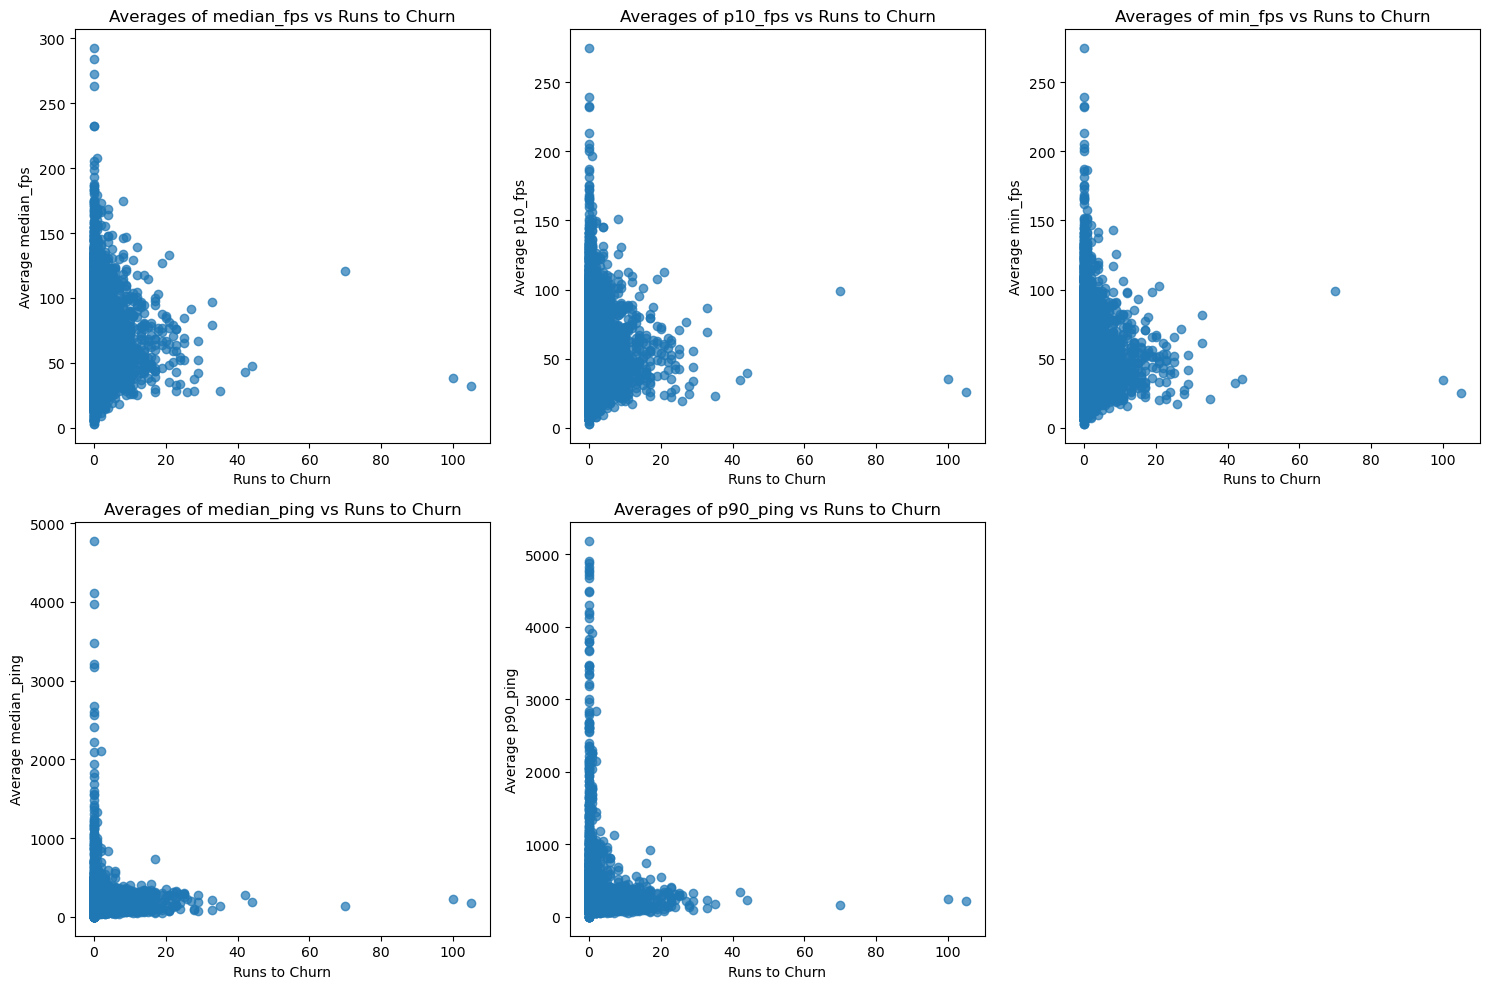

In [33]:
# Group data by userId and calculate averages for selected stats and the total number of runs till churn
grouped = df.groupby("userId").agg({
    "median_fps": "mean",
    "p10_fps": "mean",
    "min_fps": "mean",
    "median_ping": "mean",
    "p90_ping": "mean",
    "runs_to_churn": "max"
}).reset_index()

# Plot averages for each stat against the number of dungeons they will run till churn
stats = ["median_fps", "p10_fps", "min_fps", "median_ping", "p90_ping"]

plt.figure(figsize=(15, 10))
for i, stat in enumerate(stats, 1):
    plt.subplot(2, 3, i)
    plt.scatter(grouped["runs_to_churn"], grouped[stat], alpha=0.7)
    plt.title(f"Averages of {stat} vs Runs to Churn")
    plt.xlabel("Runs to Churn")
    plt.ylabel(f"Average {stat}")

plt.tight_layout()
plt.show()


In [34]:
fps_bins = [0, 20, 30, 60, 120, float('inf')]
fps_labels = ['0-20 FPS', '20-30 FPS', '30-60 FPS', '60-120 FPS', '120+ FPS']
ping_bins = [0, 30, 60, 100, 200, float('inf')]
ping_labels = ['0-30 Ping', '30-60 Ping', '60-100 Ping', '100-200 Ping', '200+ Ping']

df['median_fps_category'] = pd.cut(
    df['median_fps'], 
    bins=fps_bins, 
    labels=fps_labels
)
df['p10_fps_category'] = pd.cut(
    df['p10_fps'], 
    bins=fps_bins, 
    labels=fps_labels
)
df['min_fps_category'] = pd.cut(
    df['min_fps'], 
    bins=fps_bins, 
    labels=fps_labels
)

df['median_ping_category'] = pd.cut(
    df['median_ping'], 
    bins=ping_bins, 
    labels=ping_labels
)
df['p90_ping_category'] = pd.cut(
    df['p90_ping'], 
    bins=ping_bins, 
    labels=ping_labels
)

categories = ['median_fps_category','p10_fps_category','median_ping_category','p90_ping_category', 'min_fps_category']

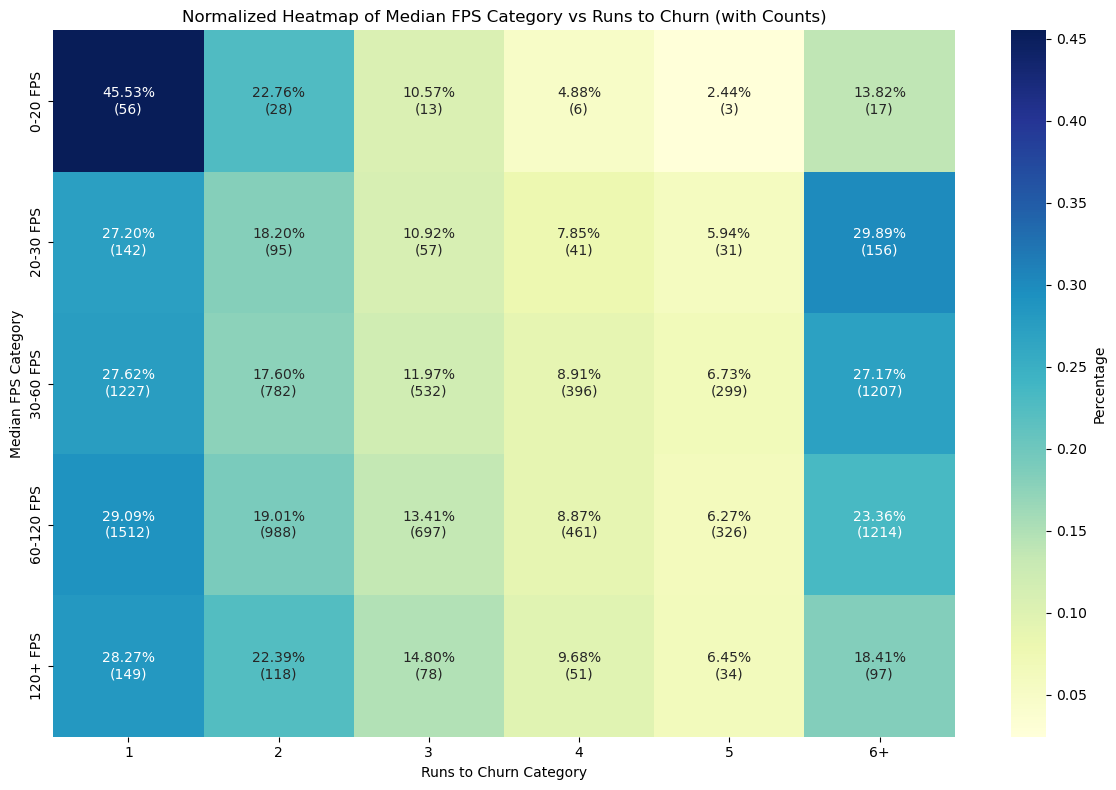

In [35]:
churn_bins = [0, 1, 2, 3, 4, 5, float('inf')]
churn_labels = ['1', '2', '3', '4', '5', '6+']

# Bucket churn metrics
df['runs_to_churn_category'] = pd.cut(
    df['runs_to_churn'],
    bins=churn_bins,
    labels=churn_labels
)

# Create a heatmap for median_fps_category vs runs_to_churn_category
# Create a heatmap for median_fps_category vs runs_to_churn_category
heatmap_data = df.pivot_table(
    index='median_fps_category',
    columns='runs_to_churn_category',
    aggfunc='size',
    fill_value=0
)

# Normalize the heatmap data by row (percentage)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Combine normalized percentages and raw counts into a single DataFrame
annot_data = heatmap_data_normalized.copy()
for row in heatmap_data.index:
    for col in heatmap_data.columns:
        annot_data.loc[row, col] = f"{heatmap_data_normalized.loc[row, col]:.2%}\n({heatmap_data.loc[row, col]})"

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_normalized, 
    annot=annot_data, 
    fmt="", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Percentage'}
)
plt.title("Normalized Heatmap of Median FPS Category vs Runs to Churn (with Counts)")
plt.xlabel("Runs to Churn Category")
plt.ylabel("Median FPS Category")
plt.tight_layout()
plt.show()


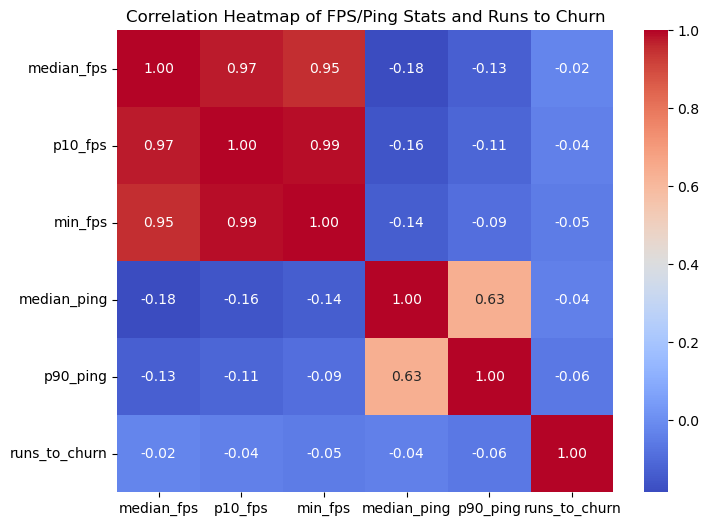

In [21]:
# Compute correlation matrix
correlation_matrix = grouped[["median_fps", "p10_fps", "min_fps", "median_ping", "p90_ping", "runs_to_churn"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of FPS/Ping Stats and Runs to Churn")
plt.show()

In [ ]:
# Step 3: Select features and target variable
features = ["median_fps", "min_fps", "p10_fps", "median_ping", "p90_ping"]
target = "runs_to_churn"

X = df[features]
y = df[target]

# Step 4: Handle missing values (if any)
X = X.fillna(X.median())

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a predictive model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 8: Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(feature_importance_df)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()